<h1> Analyzing Education's effect on Time Spent Working </h1>

<h3> Summary: </h3>
Our group aims to analyze and determine the correlation between the number of years an individual spends in school compared to how long they spend working. We perform a linear regression analysis to find the relationship that holds between the two.

<h3> Introduction: </h3>
Education is often seen as a gateway to greater understanding of the world; it is also seen as a way to gain freedom from having to work low paying jobs to pay living expenses. We aim to determine the extent of this view and track how these expectations work in reality. We also use our results to predict the number of hours worked with different kinds of higher education degrees.

For this project, we use the "Census Income" dataset from the UC Irvine Machine Learning Repository, representing data from the 1994 US Census.

<h3> Methods & Results: </h3>

--------------------

<h4> Code:

<h5> Imports

We use the pandas library for storing and processing data, the numpy data for more detailed analytical functions, and the matplotlib library to plot our findings.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# our functions, in Python folder
from Python.regression import regression

<h5> Data </h5>

Data is stored in a 4mb .data file from https://archive-beta.ics.uci.edu/ml/datasets/census+income, which functions as a .csv file. The column names, as well as other information on the dataset, are in the accompanying .names file. For the sake of simplicity we enter the names as a list below.

In [2]:
# load data, specifying there are no column names included in a header
data = pd.read_csv('data/adult.data', header=None)

# prepare column names
names = ['age',
        'workclass',
        'fnlwgt',
        'education',
        'education-num',
        'marital-status',
        'occupation',
        'relationship',
        'race',
        'sex',
        'capital-gain',
        'capital-loss',
        'hours-per-week',
        'native-country',
        'income']

# assign column names
data.columns = names

# view examples in dataset
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


The education-num data is not the years spent in formal education, but an ordinal representation of the education category. Matching the values by counting the number of occurrences in the data, we can find the intended pairs:

In [3]:
ed_counts = data['education'].value_counts().keys().tolist()
ed_num_counts = data['education-num'].value_counts().keys().tolist()
meanings= pd.DataFrame(ed_counts,ed_num_counts)
meanings.columns = ['number\'s meaning:']
meanings.sort_index()

,number's meaning:
1,Preschool
2,1st-4th
3,5th-6th
4,7th-8th
5,9th
6,10th
7,11th
8,12th
9,HS-grad
10,Some-college


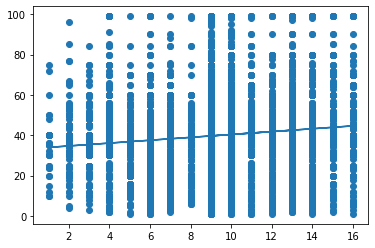

In [4]:
# isolate variables to analyze:
# - education-num, or number of years spent in education,
# - hours-per-week, or reported hours spent working every week
ed = data['education-num']
hours = data['hours-per-week']

# run polynomial regression to find best linear equation coefficients
m, b = regression(ed, hours)

# plot line calculated above
plt.scatter(ed,hours)
plt.plot(ed, m*ed+b)

In [17]:
# predictions:

# Only preschool
print("preschool", m*1+b)

# bachelors
print("Bachelors:", m*13+b)

# doctorates
print("Doctorates:", m*16+b)

# 1 education-num is close to 2 years in school at the end of the scale. So, 20 is equivalent to 3 doctorates:
print("Infer three doctorates:", m*20+b)


preschool 33.98204328850985
Bachelors: 42.51278728462039
Doctorates: 44.64547328364802
Infer three doctorates: 47.48905461568487


<h3> Discussion: </h3>

Looking at our graph above, we can that there is a positive correlation between education level and hours worked. Someone with minimal education would likely not have a full time job, and people with bachelors or doctorates tend to work slightly more (This could be due to most working exactly 40, and some working many more). Following the trend to a higher number like 20, a rough equivalent of 3 PhDs, brings us to an estimate of 47.49 hours worked a week.

There are many possible explanations as to why this exists. One possibility is that this is caused by students still in school, who have low education levels and would only work part time. Another is that jobs with lower education requirements do not allow for advancement to full time work, or that jobs with higher requirements are more demanding. 

Analyzing other variables in this dataset such as age could offer hints as to which explanation is correct. To be certain and to distinguish if this is truly causation or just correlation would likely require gathering more detailed data from other sources.

<h3> References: </h3>

Bick, Alexander, Nicola Fuchs-Schündeln, and David Lagakos. "How do hours worked vary with income? Cross-country evidence and implications." American Economic Review 108.1 (2018): 170-99.

Boswell, Robert A., and David L. Passmore. "Role of early family configuration and hours worked on student success in two-year colleges." Community College Enterprise 19.1 (2013): 9-18.

Causa, Orsetta. "Explaining differences in hours worked among OECD countries: An empirical analysis." (2008).

Heckman, James J. "The economics of inequality: The value of early childhood education." American Educator 35.1 (2011): 31.

